In [35]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [23]:
iris = load_iris()

In [24]:
X,y = iris.data, iris.target 
clf = KNeighborsClassifier()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state = 123)

print("labels for training data and testing data")
print(y_train)
print(y_test)

labels for training data and testing data
[2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0 2 1 1 0 2 2 0 0
 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1 2 1 1 1 2 0 0
 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2 2]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2]


In [26]:
# stratified split of data
# it means that the train and test test classes split in the same proportions

# initially classes divided as
print("in All ",np.bincount(y)/float(len(y))*100)
print("in train ",np.bincount(y_train)/float(len(y_train))*100)
print("in test ",np.bincount(y_test)/float(len(y_test))*100)

in All  [33.33333333 33.33333333 33.33333333]
in train  [30.47619048 38.0952381  31.42857143]
in test  [40.         22.22222222 37.77777778]


In [27]:
# after stratifying data
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state = 123,
                                                   stratify=y)
# finally classes divided as
print("in All ",np.bincount(y)/float(len(y))*100)
print("in train ",np.bincount(y_train)/float(len(y_train))*100)
print("in test ",np.bincount(y_test)/float(len(y_test))*100)


in All  [33.33333333 33.33333333 33.33333333]
in train  [33.33333333 33.33333333 33.33333333]
in test  [33.33333333 33.33333333 33.33333333]


In [31]:
#now fit the classifier
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)

print("Fraction Correct [Accuracy]:")
print(np.sum(pred_y == y_test) / float(len(y_test)))

Fraction Correct [Accuracy]:
0.9555555555555556


In [34]:
print("samples correctly predicted :")
correct_x = np.where(y_test == pred_y)[0]
print(correct_x)

print("samples not correctly classified : ")
incorrect_x = np.where(y_test != pred_y)[0]
print(incorrect_x)

samples correctly predicted :
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44]
samples not correctly classified : 
[ 0 37]


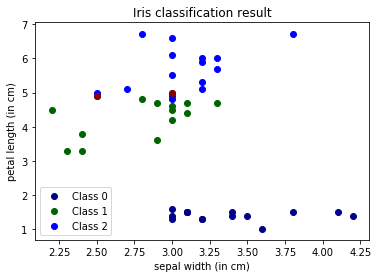

In [39]:
colors = ['darkblue','darkgreen','blue']

#plot the correctly classified points
for n,color in enumerate(colors):
    idx = np.where(y_test == n)[0]
    plt.scatter(X_test[idx,1],X_test[idx,2], color = color, label = "Class %s" % str(n))
    
#plot the wrongly classified points    
plt.scatter(X_test[incorrect_x,1], X_test[incorrect_x,2], color = "darkred")

plt.xlabel("sepal width (in cm)")
plt.ylabel("petal length (in cm)")
plt.legend(loc=3)
plt.title("Iris classification result")
plt.show()